## Семинар 8

Вам предстоит работать с двумя датасетами: [airports](https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat) и [routes](https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat). <br>
В датасете airports хранятся данные обо всех аэропортах мира по состоянию на январь 2017. Значения столбцов: <br>
**Airport ID**	Числовой индентификатор аэропорта.<br>
**Name**	    Название аэропорта.<br>
**City**	    Город.<br>
**Country**	    Страна.<br>
**IATA**	    Код IATA. Null, если отсутствует/неизвестен.<br>
**ICAO**	    Код ICAO. Null, если отсутствует/неизвестен.<br>
**Latitude**	Широта.<br>
**Longitude**	Долгота. <br>
**Altitude**	Высота над уровнем моря. <br>
**Timezone**	Часовой пояс от UTC. <br>
**DST**       	Летнее время. E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) или U (Unknown).<br>
**Tz**          Часовой пояс. Формат Olson.<br>
**Type**	    Тип терминала (в данном случае везде аэропорт).<br>
**Source**	    Источние данных. <br>

В датасете routes хранятся данные обо всех маршрутах 548 аэрокомпаний между аэропортами по состоянию на июнь 2014. Значения столбцов: <br>
**Airline**	Код авиакомпании.<br>
**Airline ID**	Числовой индентификатор авиакомпании.<br>
**Source airport**	Аэропорт вылета.<br>
**Source airport ID**	ID аэропорта вылета.<br>
**Destination airport**	Аэропорт прилета.<br>
**Destination airport ID**	ID аэропорта прилета.<br>
**Codeshare**	"Y", если полет обслуживается другой авиакомпанией, иначе пусто.<br>
**Stops**	Количество остановок в полете.<br>
**Equipment**	Тип самолета.<br>

***Внимание!*** В этих датасетах пропущенные значения иногда могут быть обозначены как '\N'.

In [1]:
airports_columns = ["id", "name", "city", "country", "code", "icao", "latitude", "longitude", "altitude", 
                    "timezone", "dst", "tz", "type", "source"]
routes_columns = ["airline", "airline_id", "source", "source_id", "dest", "dest_id", "codeshare", "stops", "equipment"]

### Задание

1. Загрузите таблицы с помощью pandas. Проверьте, что они правильно загрузились. Восстановите названия столбцов. Замените '\N' на None.
2. Оцените количество пропущенных значений.
3. Удалите столбцы или строки (в зависимости от ситуации). Оставьте только колонку city - она нам еще может пригодиться.
4. В таблицу с маршутами добавьте соответствующие значения долготы, широты, высоты над уровнем моря.
6. Приведите долготу и широту к числовому типу.
7. Напишите функцию, вычисляющую расстояние между двумя точками маршрута в киломатрах. При этом у вас уже есть функция, вычисляющая расстояние в радианах. Ваша задача:<br>
    a. Перевести заданные широту и долготу в радианы с помощью функции radians из библиотеки math или домножением на $\pi/180$.<br>
    b. Вычислить расстояние с помощью функции dist_long_lat(dlong, dlat, latitude1, latitude2), где $$dlong = longitude_1 - longitude_2$$, $$dlat = latitude_1 - latitude_2$$ ($longitude_1$, $longitude_2$, $latitude_1$, $latitude_2$ выражены в радианах).<br>
    с. Перевести вычисленное расстояние в километры, посредством домножения на радиус Земли (R = 6367 km).<br>
8. Вычислите расстояния маршрутов и добавьте их в таблицу.<br>
9. Нарисуйте гистограмму распределения длин маршрутов.<br>
10. Вычислите медиану длин маршрутов и добавьте ее к гистограмме в виде вертикальной линии.<br>
(Чтобы найти медиану, нужно отсортировать все имеющиеся значения и найти то, которое находится в центре списка.)<br>
11. Нарисуйте все аэропорта на графике (по оси x - longitude, по оси y - latitude).<br>
12. Цветом покажите высоту над уровнем моря для каждого аэропорта. (Если не отображается стобик соответствия цвета и высоты - используйте функцию plt.colorbar())<br>
13. Добавьте на эту карту 1000 (или любое другое количество) случайно выбранных маршрутов.<br>
(Чтобы выбрать случайным образом k элементов из списка elements_list возпользуйтесь фунцией sample(elements_list, k) из библиотеки random)
14. Оставьте только трансатлантические перелеты.<br>
15. Найдите все варианты маршрутов из DUS (Duesseldorf, Germany) в LAX (Los Angeles, United States) с 0 или 1 пересадкой, выпишите маршруты в виде:<br>
%airline-DUS (Duesseldorf, Germany) - %airline-LAX (Los Angeles, United States) <br>
%airline-DUS (Duesseldorf, Germany) - %airline-%airport (%city, %country) - %airline-LAX (Los Angeles, United States)
16. Нарисуйте эти маршруты на карте.
16. Найдите самый короткий маршрут с одной пересадкой.

In [2]:
import math
def dist_long_lat(dlong, dlat, lat1, lat2):
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlong/2)**2
    return 2 * math.asin(math.sqrt(a))

In [241]:
import os
from urllib.request import urlretrieve
urlretrieve('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat','airports.dat')


('airports.dat', <http.client.HTTPMessage at 0x26cf16f38d0>)

In [12]:
urlretrieve('https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat','routes.dat')

('routes.dat', <http.client.HTTPMessage at 0x19ded3fac88>)

In [172]:
# Ex. 1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_air = pd.read_table("airports.dat", sep=",",header=None)
df_rt = pd.read_table("routes.dat", sep=",",header=None)
df_air.columns = airports_columns
df_rt.columns = routes_columns
p={'\\N':np.nan,'NaN':np.nan,'NAN':np.nan}
df_rt=df_rt.replace(p)
df_air=df_air.replace(p)
            
df_rt.head(500)
df_d = df_rt[df_rt['stops'] == 1]
#df_d.head(500)
#df_air.head(50)
#df_rt.shape[0]

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
2066,5T,1623,YRT,132,YEK,50,NaN,1,ATR
7810,AC,330,ABJ,253,BRU,302,NaN,1,333
8272,AC,330,YVR,156,YBL,30,NaN,1,BEH
17767,CU,1936,FCO,1555,HAV,1909,NaN,1,767
25116,FL,1316,HOU,3566,SAT,3621,NaN,1,735
25220,FL,1316,MCO,3878,HOU,3566,NaN,1,73W
25230,FL,1316,MCO,3878,ORF,3611,NaN,1,717
49746,SK,4319,ARN,737,GEV,715,NaN,1,ATP
63567,WN,4547,BOS,3448,MCO,3878,NaN,1,73W
64042,WN,4547,MCO,3878,BOS,3448,NaN,1,73W


In [30]:
# Ex. 2
#print(df_rt.isna().sum())
#print(df_air.isna().sum())

In [ ]:
# Ex. 3


In [6]:
# Функция для 4 пункта
def coordin(col_name,airport):
    v=[0 for i in range(0,df_rt[airport].shape[0])]
    df_rt[col_name[0]]=v
    df_rt[col_name[1]]=v
    df_rt[col_name[2]]=v
    #print(df_rt[airport].iloc[1] in col_cor)
    for i in range(df_rt[airport].shape[0]):
        if df_rt[airport].iloc[i] in col_cor:
            df_rt[col_name[0]].iloc[i]=col_cor[df_rt[airport].iloc[i]][0]
            df_rt[col_name[1]].iloc[i]=col_cor[df_rt[airport].iloc[i]][1]
            df_rt[col_name[2]].iloc[i]=col_cor[df_rt[airport].iloc[i]][2]
        else:
            df_rt[col_name[0]].iloc[i]=np.nan
            df_rt[col_name[1]].iloc[i]=np.nan
            df_rt[col_name[2]].iloc[i]=np.nan


In [206]:
# Ex. 4
col_lat=[]
col_s={}
col_long=[]
col_lev=[]
s=0
a=0
col_cor={df_air['code'][i]:[df_air['latitude'][i],df_air['longitude'][i],df_air['altitude'][i]] for i in range(df_air['code'].shape[0])}
del col_cor[np.nan]
air_name=['source','dest']
cols_name=[['latitude_sour','longitude_sour','altitude_sour'],['latitude_dist','longitude_dist','altitude_dist']]

for i in range(len(air_name)):
    coordin(cols_name[i],air_name[i])
    

    #print(s)
#col_lat=[col_cor[j][0] for i in (df_rt['source']) for j in col_cor if i==j]

#df_rt['latitude_sour']=col_lat
#df_rt['longitude_sour']=col_1
#df_rt['altitude_sour']=col_2
df_rt.head()
#len(col_cor)#['GKA'][0]
#len(col_lev)
#df_rt['source'].shape[0]
#print(col_cor)

True


D:\Program_Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


True


,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment,latitude_sour,longitude_sour,altitude_sour,latitude_dist,longitude_dist,altitude_dist
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2,43.449902,39.956600,89.0,55.606201,49.278702,411.0
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2,46.283298,48.006302,-65.0,55.606201,49.278702,411.0
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2,46.283298,48.006302,-65.0,44.225101,43.081902,1054.0
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2,55.305801,61.503300,769.0,55.606201,49.278702,411.0
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2,55.305801,61.503300,769.0,55.012600,82.650703,365.0


43

In [25]:
# Ex. 5

type(df_rt['latitude'][2])

numpy.float64

In [20]:
# Ex. 6
def dist(lat_1,long_1,lat_2,long_2):
    if lat_1==np.nan or long_1==np.nan or lat_2==np.nan or long_2==np.nan:
        return np.nan
    else:
        lat_1=math.radians(lat_1)
        long_1=math.radians(long_1)
        lat_2=math.radians(lat_2)
        long_2=math.radians(long_2)
        dlong=long_1-long_2
        dlat=lat_1-lat_2
        return dist_long_lat(dlong, dlat, lat_1, lat_2)*6367
#dist(43.449902,39.956600,55.606201,55.606201)

1752.111004209182

In [207]:
# Ex. 7
s=[0 for i in range(0,df_rt.shape[0])]
df_rt['distance']=s
for i in range(df_rt.shape[0]):
    df_rt['distance'].iloc[i]=dist(df_rt['latitude_sour'].iloc[i],df_rt['longitude_sour'].iloc[i],df_rt['latitude_dist'].iloc[i],df_rt['longitude_dist'].iloc[i])

D:\Program_Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [208]:
df_rt.head()

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment,latitude_sour,longitude_sour,altitude_sour,latitude_dist,longitude_dist,altitude_dist,distance
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2,43.449902,39.956600,89.0,55.606201,49.278702,411.0,1505.879589
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2,46.283298,48.006302,-65.0,55.606201,49.278702,411.0,1039.785086
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2,46.283298,48.006302,-65.0,44.225101,43.081902,1054.0,447.883531
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2,55.305801,61.503300,769.0,55.606201,49.278702,411.0,770.024740
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2,55.305801,61.503300,769.0,55.012600,82.650703,365.0,1337.791014


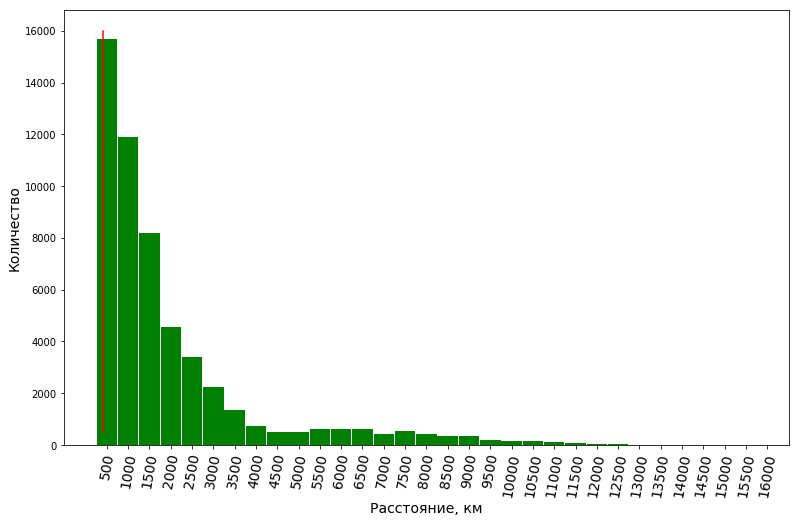

In [65]:
# Ex. 8, Ex. 9
x=list(df_rt['distance'])
y=x.copy()
y.sort()
c=y[len(y)//2]
#ff = df.groupby('crash_time')
#f=[time(df['crash_time'].iloc[i]) for i in range(df['crash_time'].shape[0])]
bins=np.array(range(500,int(max(x)),500))
plt.figure(figsize=(13,8))
plt.plot([y[len(y)//2] for i in range(len(bins))],bins,c='red')
plt.hist(x,bins=bins,histtype='bar',color='green',rwidth=0.96,align='left')
plt.xticks(bins,fontsize=14,rotation=80)
plt.xlabel('Расстояние, км',fontsize=14)
plt.ylabel('Количество',fontsize=14)
plt.show()




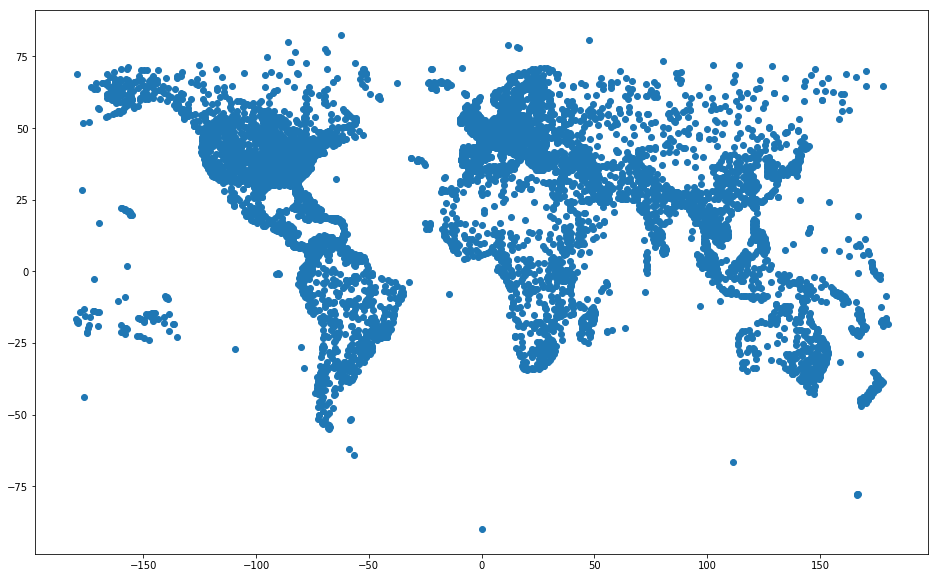

In [108]:
# Ex. 10 Нарисуйте все аэропорта на графике (по оси x - longitude, по оси y - latitude).
x_long=[df_air['longitude'][i] for i in range(df_air['longitude'].shape[0]) if df_air['longitude'][i]!=np.nan]
y_lat=[df_air['latitude'][i] for i in range(df_air['longitude'].shape[0]) if df_air['latitude'][i]!=np.nan]
plt.figure(figsize=(16,10))
plt.plot(x_long,y_lat,'o')
plt.show()

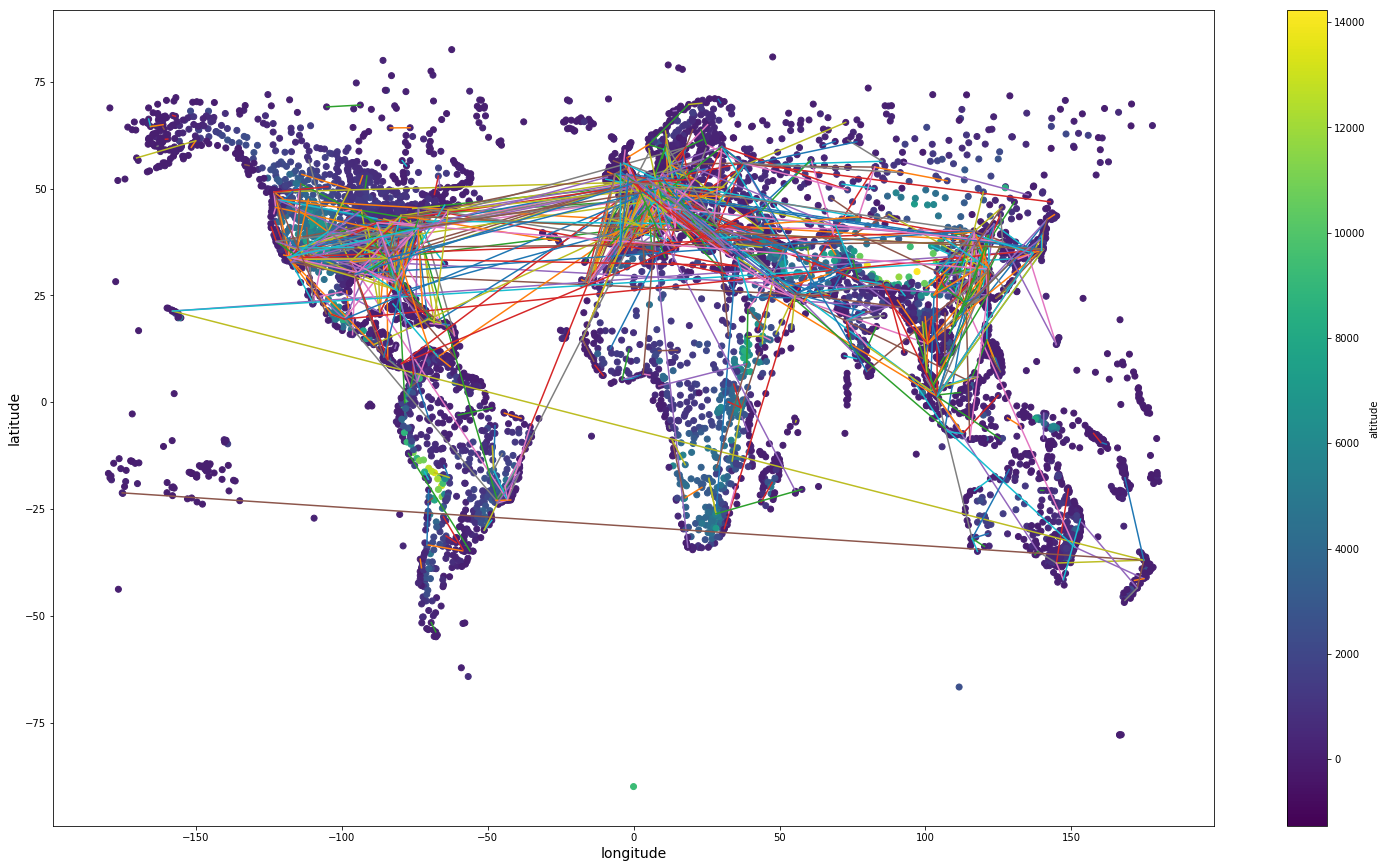

In [211]:
# Ex. 11 Цветом покажите высоту над уровнем моря для каждого аэропорта. (Если не отображается стобик соответствия цвета 
#         и высоты - используйте функцию plt.colorbar())
# Ex. 12    Добавьте на эту карту 1000 (или любое другое количество) случайно выбранных маршрутов.(Чтобы выбрать случайным 
#           образом k элементов из списка elements_list возпользуйтесь фунцией sample(elements_list, k) из библиотеки random)

import random as rnd

x_long=[df_air['longitude'][i] for i in range(df_air['longitude'].shape[0]) if df_air['longitude'][i]!=np.nan]
y_lat=[df_air['latitude'][i] for i in range(df_air['longitude'].shape[0]) if df_air['latitude'][i]!=np.nan]
z_alt=[df_air['altitude'][i] for i in range(df_air['altitude'].shape[0]) if df_air['altitude'][i]!=np.nan]
plt.figure(figsize=(26,15))
#plt.colorbar()
u=[[i,df_rt['source'].iloc[i],df_rt['dest'].iloc[i]] for i in range(df_rt['source'].shape[0]) if (df_rt['source'].iloc[i]!=np.nan and df_rt['dest'].iloc[i]!=np.nan)]
uu=rnd.sample(list(u),1000)
for i in uu:
    xx=[df_rt['longitude_sour'].iloc[i[0]],df_rt['longitude_dist'].iloc[i[0]]]
    yy=[df_rt['latitude_sour'].iloc[i[0]],df_rt['latitude_dist'].iloc[i[0]]]
    plt.plot(xx,yy)
plt.xlabel('longitude',fontsize=14)
plt.ylabel('latitude',fontsize=14)
air_line=plt.scatter(x=x_long,y=y_lat,c=z_alt,label=z_alt,)
plt.colorbar(label='altitude')

plt.show()
#min(z_alt)


In [242]:
df_rt.head()

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment,latitude_sour,longitude_sour,altitude_sour,latitude_dist,longitude_dist,altitude_dist,distance
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2,43.449902,39.956600,89.0,55.606201,49.278702,411.0,1505.879589
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2,46.283298,48.006302,-65.0,55.606201,49.278702,411.0,1039.785086
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2,46.283298,48.006302,-65.0,44.225101,43.081902,1054.0,447.883531
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2,55.305801,61.503300,769.0,55.606201,49.278702,411.0,770.024740
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2,55.305801,61.503300,769.0,55.012600,82.650703,365.0,1337.791014


In [154]:
# Ex. 13  Оставьте только трансатлантические перелеты.


In [243]:
# Ex. 14 Найдите все варианты маршрутов из DUS (Duesseldorf, Germany) в LAX (Los Angeles, United States) с 0 или 1 
#        пересадкой, выпишите маршруты в виде:
#        %airline-DUS (Duesseldorf, Germany) - %airline-LAX (Los Angeles, United States) 
#        %airline-DUS (Duesseldorf, Germany) - %airline-%airport (%city, %country) - 
#        %airline-LAX (Los Angeles, United States)
index=[]
df_dus = df_rt[df_rt['source'] == 'DUS']
for i in range(df_dus.shape[0]):
    if df_dus['dest'].iloc[i]=='LAX' and df_dus['stops'].iloc[i]==0:
        index.append(i)
        print(df_dus['airline'].iloc[i],'-DUS (Duesseldorf, Germany) -', df_dus['airline'].iloc[i],'-LAX (Los Angeles, United States)')
#df_dus['source'].iloc[84]
#df_dus.shape[0]

AA -DUS (Duesseldorf, Germany) - AA -LAX (Los Angeles, United States)
AB -DUS (Duesseldorf, Germany) - AB -LAX (Los Angeles, United States)


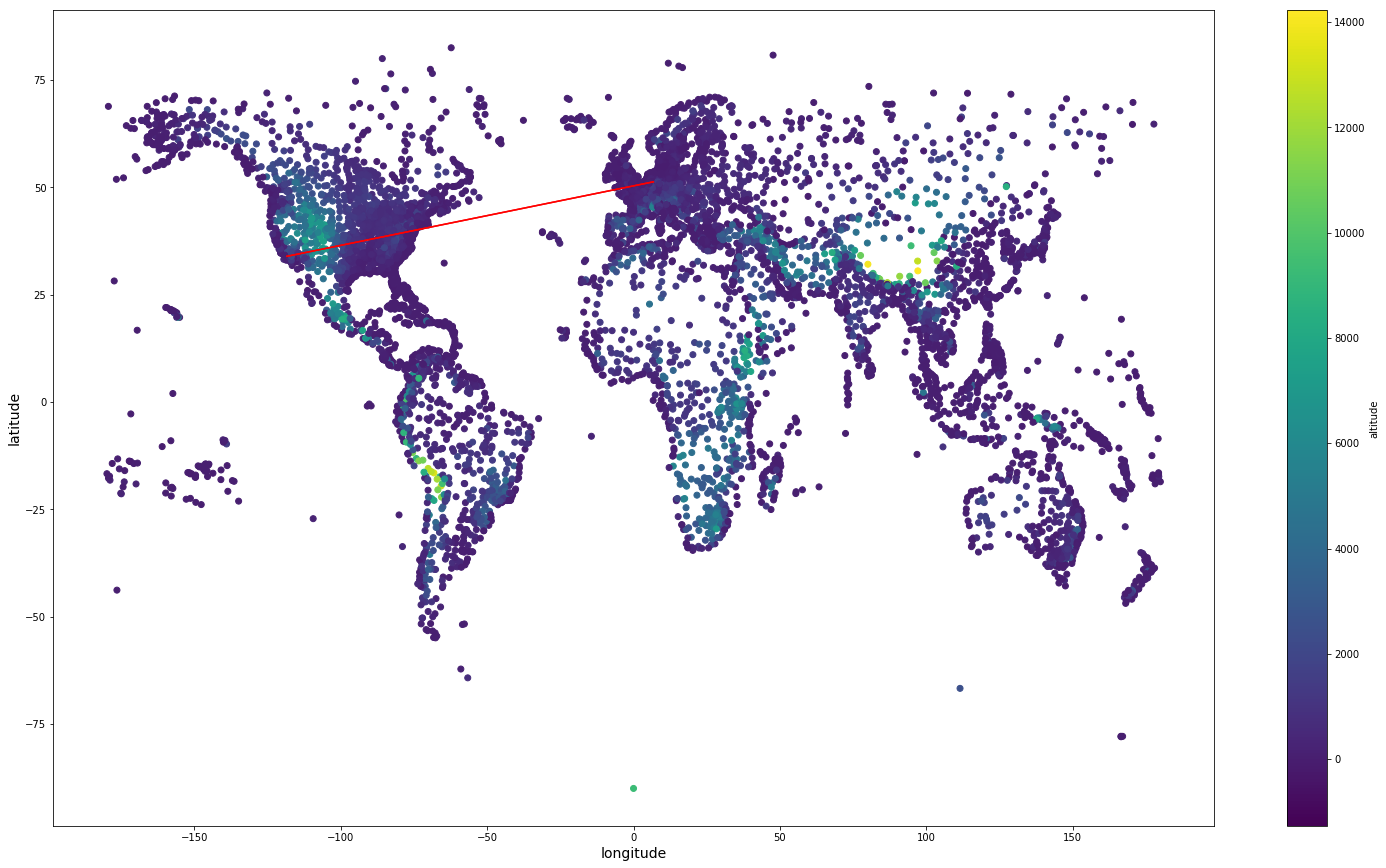

In [244]:
# Ex. 15 Нарисуйте эти маршруты на карте.
x_long=[df_air['longitude'][i] for i in range(df_air['longitude'].shape[0]) if df_air['longitude'][i]!=np.nan]
y_lat=[df_air['latitude'][i] for i in range(df_air['longitude'].shape[0]) if df_air['latitude'][i]!=np.nan]
z_alt=[df_air['altitude'][i] for i in range(df_air['altitude'].shape[0]) if df_air['altitude'][i]!=np.nan]
plt.figure(figsize=(26,15))
#plt.colorbar()

for i in range(len(index)):
    x_d=[df_dus['longitude_sour'].iloc[index[i]],df_dus['longitude_dist'].iloc[index[i]]]
    y_d=[df_dus['latitude_sour'].iloc[index[i]],df_dus['latitude_dist'].iloc[index[i]]]
    plt.plot(x_d,y_d,'r')
    


plt.xlabel('longitude',fontsize=14)
plt.ylabel('latitude',fontsize=14)
air_line=plt.scatter(x=x_long,y=y_lat,c=z_alt,label=z_alt,)
plt.colorbar(label='altitude')

plt.show()

In [240]:
# Ex. 16 Найдите самый короткий маршрут с одной пересадкой.
df_distance = df_rt[df_rt['stops'] == 1]
num=list(df_distance['distance']).index((min(list(df_distance['distance']))))
print('Самый короткий маршрут с одной пересадкой:',df_distance['source'].iloc[num],'-', df_distance['dest'].iloc[num])


Самый короткий маршрут с одной пересадкой: YVR - YBL
